   ###  Ford Bike System Data Analysis 

    by : Lamya'a K. Balubaid 


    Dataset 

    A data from A GoBike dataset from Feb 2018 trips and it has 11 columns Include: 

        duration_min               
        start_station_id           
        start_station_name         
        start_station_latitude     
        start_station_longitude    
        end_station_id            
        end_station_name          
        end_station_latitude       
        end_station_longitude      
        bike_id                
        user_type                  
        member_gender              
        bike_share_for_all_trip   


    Overview 

    In the last project in NAND, I performed an exploratory investigation on data given by Ford GoBike, a bike-share system supplier, utilizing Python visualization analysis. The objective is to figure out what factors have the foremost compelling control on a bicycle sharing benefit. This benefit works USA. The bicycle-sharing benefit has picked up notoriety in major cities over the globe. They permit individuals in metropolitan regions to lease bikes for brief trips more often than not inside 30 minutes. Passage GoBike has collected a affluent sum of data. Nearly all highlights were using in the analyses.




            
               
              

In [91]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import matplotlib

import matplotlib.ticker as tick
import seaborn as sns   
from bokeh.io import output_file, show, output_notebook
from bokeh.models import ColumnDataSource, GMapOptions
from bokeh.plotting import gmap, figure

# ThisYear = date.today().timetuple()[0]

import os
from datetime import timedelta, date, datetime
import io
import zipfile
import requests
import itertools
import pprint as pp


## suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

%matplotlib inline

# 1. Gathering Data


Load in your dataset.


In [ ]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [ ]:
print(df.shape)

In [ ]:
df.head(1)

In [ ]:
print(df.info())

# 2. Assessing Data

In [6]:
df.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [7]:
df.isnull().any()

duration_sec               False
start_time                 False
end_time                   False
start_station_id            True
start_station_name          True
start_station_latitude     False
start_station_longitude    False
end_station_id              True
end_station_name            True
end_station_latitude       False
end_station_longitude      False
bike_id                    False
user_type                  False
member_birth_year           True
member_gender               True
bike_share_for_all_trip    False
dtype: bool

In [8]:
df.describe()

duration_sec  start_station_id  start_station_latitude  \
count  183412.000000     183215.000000           183412.000000   
mean      726.078435        138.590427               37.771223   
std      1794.389780        111.778864                0.099581   
min        61.000000          3.000000               37.317298   
25%       325.000000         47.000000               37.770083   
50%       514.000000        104.000000               37.780760   
75%       796.000000        239.000000               37.797280   
max     85444.000000        398.000000               37.880222   

       start_station_longitude  end_station_id  end_station_latitude  \
count            183412.000000   183215.000000         183412.000000   
mean               -122.352664      136.249123             37.771427   
std                   0.117097      111.515131              0.099490   
min                -122.453704        3.000000             37.317298   
25%                -122.412408       44.000000             37.770407   
50%                -122.398285      100.000000             37.781010   
75%                -122.286533      235.000000             37.797320   
max                -121.874119      398.000000             37.880222   

       end_station_longitude        bike_id  member_birth_year  
count          183412.000000  183412.000000      175147.000000  
mean             -122.352250    4472.906375        1984.806437  
std                 0.116673    1664.383394          10.116689  
min              -122.453704      11.000000        1878.000000  
25%              -122.411726    3777.000000        1980.000000  
50%              -122.398279    4958.000000        1987.000000  
75%              -122.288045    5502.000000        1992.000000  
max              -121.874119    6645.000000        2001.000000

In [9]:
df.duplicated().sum()

0

In [10]:
df['member_gender'].value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [11]:
df['user_type'].value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

In [12]:
df['start_station_name'].value_counts()

Market St at 10th St                                               3904
San Francisco Caltrain Station 2  (Townsend St at 4th St)          3544
Berry St at 4th St                                                 3052
Montgomery St BART Station (Market St at 2nd St)                   2895
Powell St BART Station (Market St at 4th St)                       2760
San Francisco Ferry Building (Harry Bridges Plaza)                 2710
San Francisco Caltrain (Townsend St at 4th St)                     2703
Powell St BART Station (Market St at 5th St)                       2327
Howard St at Beale St                                              2293
Steuart St at Market St                                            2283
The Embarcadero at Sansome St                                      2082
Bancroft Way at Telegraph Ave                                      1796
Bancroft Way at College Ave                                        1770
2nd St at Townsend St                                           

In [13]:
df.duplicated().value_counts()

False    183412
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


#### Observations: 

    1- Data has rows 29225 and 16 columns
    2- Trip duration is in sec
    3- Start and End time are not in datetime datetype 
    4- There's many missing data 
    5- No duplicates in the dataset 
    
   

# Cleaning Data 

In [15]:
# Define: Copy Data


#code 
df_clean = df.copy()

In [16]:
# Test 

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [17]:
# Define : Changing The Data Type

#Code: 

df_clean.start_time = df_clean.start_time.astype('datetime64')

df_clean.end_time = df_clean.end_time.astype('datetime64')

df_clean.start_station_id = df_clean.start_station_id.astype('str')

df_clean.end_station_id = df_clean.end_station_id.astype('str')

df_clean.bike_id = df_clean.bike_id.astype('str')

df_clean.member_gender  = df_clean.member_gender.astype('category')



In [18]:
#test 

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null datetime64[ns]
end_time                   183412 non-null datetime64[ns]
start_station_id           183412 non-null object
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183412 non-null object
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null object
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null category
bike_share_for_all_trip    183412 non-null object
dtypes: category(1), datetime64[ns](2), float64(5), int64(1), objec

In [19]:
# Define: drop duplicated 


# Code: 

df_clean = df_clean.drop_duplicates()

In [20]:
#test 

sum(df_clean.duplicated())

0

In [21]:
#Define: Duration time change it to seconds 

#Code: 

import datetime as dt

df_clean['duration_minute'] = df_clean['duration_sec']/60

In [22]:
#test

df_clean['duration_minute']

0          869.750000
1          708.683333
2         1030.900000
3          608.166667
4           26.416667
5           29.883333
6           19.116667
7           26.916667
8           26.166667
9           17.483333
10           7.633333
11           8.433333
12          19.600000
13          15.250000
14           6.583333
15           3.466667
16           9.133333
17          11.233333
18           9.283333
19          14.566667
20           6.950000
21           6.900000
22          12.383333
23           6.116667
24           4.200000
25           6.000000
26           6.416667
27           6.800000
28          10.833333
29          10.483333
             ...     
183382      16.016667
183383       7.233333
183384       3.066667
183385       6.666667
183386       7.083333
183387       9.966667
183388       8.166667
183389       3.066667
183390       3.866667
183391       4.483333
183392      21.483333
183393       2.583333
183394      12.000000
183395       1.583333
183396    

In [23]:
#change memeber year to birth age

ThisYear = date.today().timetuple()[0]

df_clean['memeber_old'] = ThisYear - df_clean['member_birth_year']

In [24]:
df_clean['memeber_old'].value_counts()

33.0     10236
28.0      9325
32.0      8972
31.0      8658
30.0      8498
29.0      8250
34.0      8018
35.0      7973
27.0      7660
26.0      7423
36.0      7028
37.0      6562
38.0      5954
41.0      5024
39.0      4990
25.0      4640
40.0      4345
42.0      3756
24.0      3481
23.0      3208
43.0      2830
44.0      2725
47.0      2633
22.0      2528
46.0      2503
45.0      2442
48.0      2080
53.0      1928
50.0      1924
49.0      1909
         ...  
67.0       301
69.0       189
70.0       180
71.0       178
68.0       158
74.0       135
66.0       134
76.0       105
72.0        99
90.0        89
121.0       53
73.0        51
20.0        34
78.0        30
79.0        21
88.0        20
75.0        19
82.0        11
119.0       11
80.0         9
120.0        6
83.0         3
101.0        3
77.0         2
87.0         2
143.0        1
93.0         1
91.0         1
111.0        1
94.0         1
Name: memeber_old, Length: 75, dtype: int64

In [25]:
#test

df_clean.head(1)

duration_sec              start_time                end_time  \
0         52185 2019-02-28 17:32:10.145 2019-03-01 08:01:55.975   

  start_station_id                                start_station_name  \
0             21.0  Montgomery St BART Station (Market St at 2nd St)   

   start_station_latitude  start_station_longitude end_station_id  \
0               37.789625              -122.400811           13.0   

                 end_station_name  end_station_latitude  \
0  Commercial St at Montgomery St             37.794231   

   end_station_longitude bike_id user_type  member_birth_year member_gender  \
0            -122.402923    4902  Customer             1984.0          Male   

  bike_share_for_all_trip  duration_minute  memeber_old  
0                      No           869.75         37.0

In [26]:
# #Define: Drop Columns is not important 

# df_copyD = ['member_birth_year']

# df_clean = df_clean.drop(columns = df_copyD , axis = 1)

In [27]:
list(df_clean.columns)

['duration_sec',
 'start_time',
 'end_time',
 'start_station_id',
 'start_station_name',
 'start_station_latitude',
 'start_station_longitude',
 'end_station_id',
 'end_station_name',
 'end_station_latitude',
 'end_station_longitude',
 'bike_id',
 'user_type',
 'member_birth_year',
 'member_gender',
 'bike_share_for_all_trip',
 'duration_minute',
 'memeber_old']

In [28]:
# Define:
# Creating A year table 
# A month Table 
# A day Table using start time table

#Code: 
# A Year 
df_clean['year'] = df_clean['start_time'].dt.strftime('%Y')
# A Month 
df_clean['month'] = df_clean['start_time'].dt.month.astype(int)
# A day 
df_clean['day'] = df_clean['start_time'].dt.strftime('%a')
df_clean['week_day'] = df_clean['start_time'].dt.weekday_name
# A date 
df_clean['date'] = df_clean['start_time'].dt.date
# A hour 
df_clean['hour'] = df_clean['start_time'].dt.hour


In [29]:
list(df_clean.columns)

['duration_sec',
 'start_time',
 'end_time',
 'start_station_id',
 'start_station_name',
 'start_station_latitude',
 'start_station_longitude',
 'end_station_id',
 'end_station_name',
 'end_station_latitude',
 'end_station_longitude',
 'bike_id',
 'user_type',
 'member_birth_year',
 'member_gender',
 'bike_share_for_all_trip',
 'duration_minute',
 'memeber_old',
 'year',
 'month',
 'day',
 'week_day',
 'date',
 'hour']

In [30]:
df_clean.sample(2)

duration_sec              start_time                end_time  \
159              336 2019-02-28 22:42:10.540 2019-02-28 22:47:46.645   
164347           573 2019-02-05 08:29:58.309 2019-02-05 08:39:32.301   

       start_station_id          start_station_name  start_station_latitude  \
159               244.0  Shattuck Ave at Hearst Ave               37.873676   
164347            369.0          Hyde St at Post St               37.787349   

        start_station_longitude end_station_id           end_station_name  \
159                 -122.268487          247.0  Fulton St at Bancroft Way   
164347              -122.416651           77.0       11th St at Natoma St   

        end_station_latitude  ...   member_gender bike_share_for_all_trip  \
159                37.867789  ...          Female                      No   
164347             37.773507  ...          Female                      No   

       duration_minute  memeber_old  year month  day  week_day        date  \
159               5.60         24.0  2019     2  Thu  Thursday  2019-02-28   
164347            9.55         35.0  2019     2  Tue   Tuesday  2019-02-05   

        hour  
159       22  
164347     8  

[2 rows x 24 columns]

## 3. Storing data

In [31]:
df_clean.to_csv('ford_gobike.csv', index =False , header = True)

## II. Data Exploration

In [32]:
# load data 


In [33]:
d_type = {'user_type': 'category'}  
p_dates = ['start_time', 'end_time']         # Set date variable as a datetime datatype 

# import the csv respecting datatypes
df =pd.read_csv('ford_gobike.csv', dtype=d_type, parse_dates=p_dates)   

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 24 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null datetime64[ns]
end_time                   183412 non-null datetime64[ns]
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null category
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
duration_minute            183412 non-null float64
memeber_old    

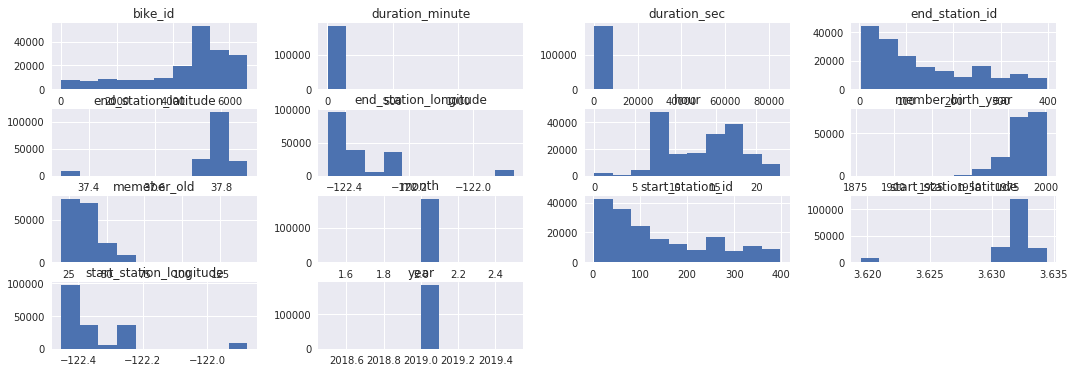

In [80]:
df.hist(figsize =(18,6));

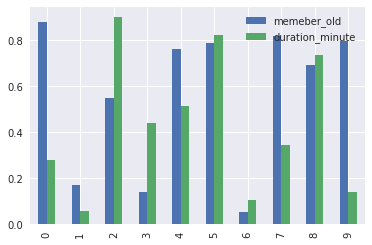

In [90]:
df = pd.DataFrame(np.random.rand(10, 2), columns=["memeber_old", "duration_minute"])
df.plot.bar();

#### The most important intrest feature in my dataset 

Is to understand the relationship between (the user type , gender , age , time) in duration  

### Univariate Exploration

In this section, the distributions of individual variables will be investigated.

In [35]:
c = sns.color_palette()[0]

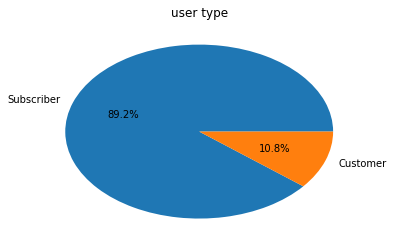

In [36]:
user = df["user_type"].value_counts()
plt.pie(data=df,x=user,labels=user.index,autopct='%1.1f%%');
plt.title("user type");

Text(0.5,1,'The Gender of user')

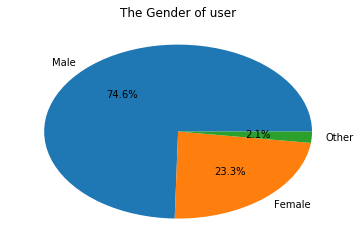

In [37]:
gender_user = df['member_gender'].value_counts()

plt.pie(data = df , x= gender_user , labels =gender_user.index , autopct = '%1.1f%%');

plt.title('The Gender of user')

    The majority of user type as shown above is Subscriber and the most of them male

As showen Above in the graph the most of the members are male members 

## Duration Of Trip Per Day

    In any case, I was only inquisitive to perceive the number of rides were taken per day. We see by the perception beneath that the normal ride. 

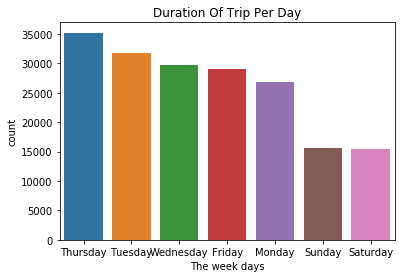

In [38]:
sns.countplot(data = df , x = 'week_day', order=df.week_day.value_counts().index)
plt.title('Duration Of Trip Per Day')
plt.xlabel('The week days');


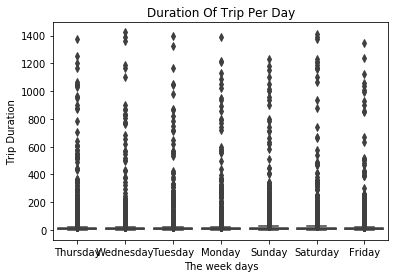

In [39]:
sns.boxplot(data = df , x = 'week_day', y = 'duration_minute' , color = c)
plt.title('Duration Of Trip Per Day')
plt.xlabel('The week days');
plt.ylabel('Trip Duration');

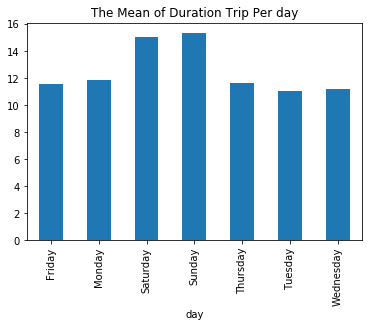

In [40]:
df[['week_day' , 'duration_minute']].groupby('week_day').mean().plot(kind = 'bar' , legend = None)
plt.title('The Mean of Duration Trip Per day')
plt.xlabel('day');


As shown above there's missing data of the other week but the peakest day is Thursday

In [41]:
sns.countplot(data = df , x = 'hour', order=df.hour.value_counts().index)
plt.title('Duration Of Trip Per hour')
plt.xlabel('Hours');

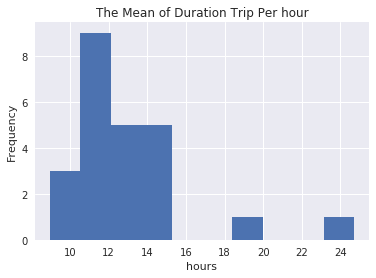

In [71]:
df[['hour' , 'duration_minute']].groupby('hour').mean().plot(kind = 'hist' , legend = None)
plt.title('The Mean of Duration Trip Per hour')
plt.xlabel('hours');


As shown above the most peak hour is 8 AM and 5 PM 

### The gen Took the Most Rides


In our next investigation here, we see which age are taking the most rides. As should be obvious, there is certainly a privilege slant with age, however it may shock you that the pinnacle isn't on the left tail, by the same token. Maybe, the pinnacle is more around that mid 30's age. I realize I was anticipating that the peak should be in the right on time to mid-20's territory!

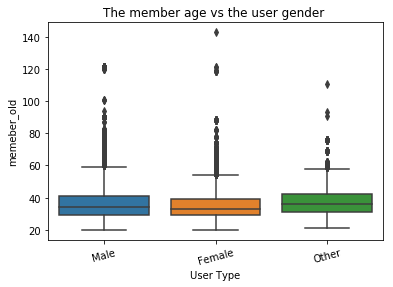

In [43]:
sns.boxplot(data = df , x = 'member_gender' , y = 'memeber_old' , order = df.member_gender.value_counts().index)
plt.title('The member age vs the user gender ')
plt.xticks(rotation = 15);
plt.xlabel('User Type');


In [44]:
list(df.columns)

['duration_sec',
 'start_time',
 'end_time',
 'start_station_id',
 'start_station_name',
 'start_station_latitude',
 'start_station_longitude',
 'end_station_id',
 'end_station_name',
 'end_station_latitude',
 'end_station_longitude',
 'bike_id',
 'user_type',
 'member_birth_year',
 'member_gender',
 'bike_share_for_all_trip',
 'duration_minute',
 'memeber_old',
 'year',
 'month',
 'day',
 'week_day',
 'date',
 'hour']

In [45]:
df['duration_sec'].describe()

count    183412.000000
mean        726.078435
std        1794.389780
min          61.000000
25%         325.000000
50%         514.000000
75%         796.000000
max       85444.000000
Name: duration_sec, dtype: float64

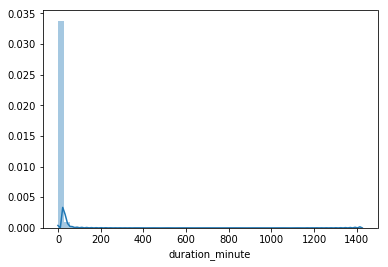

In [46]:
sns.distplot(df['duration_minute']);

In [47]:
#skewness and kurtosis
print("Skewness: %f" % df['duration_minute'].skew())
print("Kurtosis: %f" % df['duration_minute'].kurt())

Skewness: 26.839101
Kurtosis: 921.856583


In [48]:
bins = np.arange(df['duration_sec'].min() , 
                 df['duration_sec'].max()+ 20, 20)
plt.hist(df['duration_sec'], bins = bins);
plt.title('Trip Distance in Minutes')


Text(0.5,1,'Trip Distance in Minutes')

In [49]:
# sns.distplot(df['duration_minute'], bins=50, kde=True, rug=True)
# #

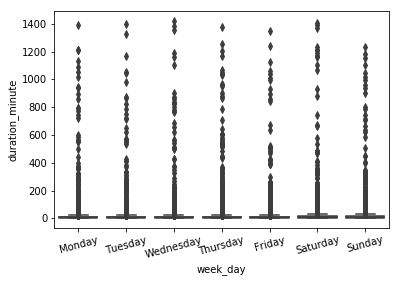

In [50]:
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
msk = df['duration_minute'] < 2000
sns.boxplot(x="week_day", y="duration_minute", data=df[msk], order=order)
plt.xticks(rotation = 15);


### Bivariate Exploration
In this section some bivariate exploration will be done, the trip duration needs an exponential transformation to get an significant graphs

The exponential transformation is already done 'exp_trans', an yticks settings are neeeded

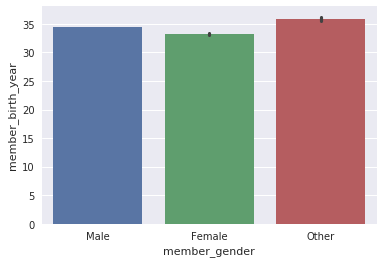

In [73]:
sns.barplot(x = 'member_gender', y = 2019 -  df['member_birth_year'] ,  data = df , order = df.member_gender.value_counts().index)

plt.show();

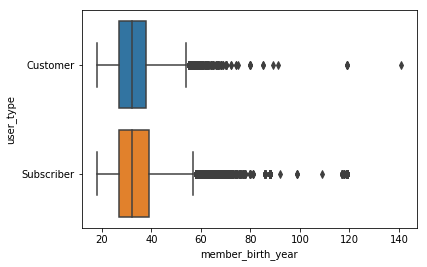

In [52]:
sns.boxplot(x =  2019 -  df['member_birth_year'] , y='user_type' , data = df)

plt.show();

## Duration Of Trip Per hour and by gender 

    In any case, I was only inquisitive to perceive the number of rides were taken per gender and hourly.

In [53]:
sns.boxplot(x = 'member_gender' , y= 'hour' , data = df , order = df.member_gender.value_counts().index)

plt.show();

## Duration Of Trip Per duration

    In any case, I was only inquisitive to perceive the number of rides were taken per day and how much it takes for one ride

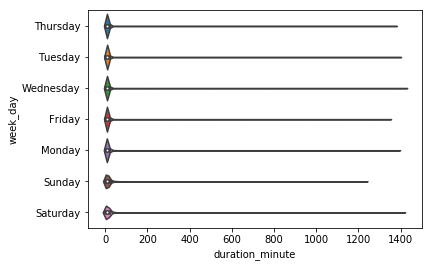

In [54]:
sns.violinplot( x = "duration_minute" , y = "week_day" , data = df , size = 6 , order = df.week_day.value_counts().index)

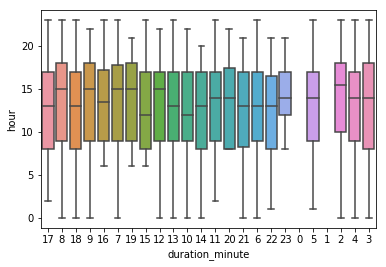

In [55]:
sns.boxplot( x = "duration_minute" , y = "hour" , data = df , order = df.hour.value_counts().index)

### Multivariate Exploration
Create plots of three or more variables to investigate your data even further. Make sure that your investigations are justified, and follow from your work in the previous sections.

In [56]:
# df[df['hour'] < 25].plot.scatter(x='hour', y='duration_minute')

In [57]:
#scatter plot totalbsmtsf/saleprice
var = 'member_birth_year'
data = pd.concat([df['duration_minute'], df[var]], axis=1)
data.plot.scatter(x=var, y='duration_minute');


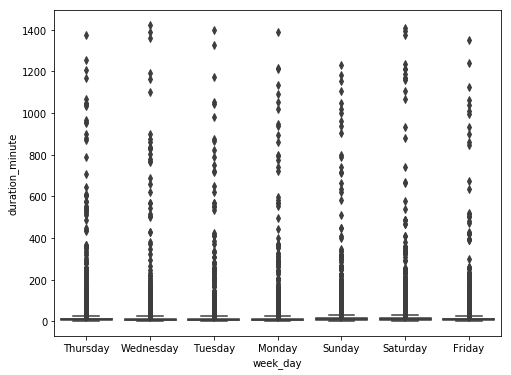

In [58]:
#box plot overallqual/saleprice
var = 'week_day'
data = pd.concat([df['duration_minute'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="duration_minute", data=data)


In [59]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [60]:
g = sns.PairGrid(data = df, vars = ['start_station_latitude', 'start_station_longitude'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

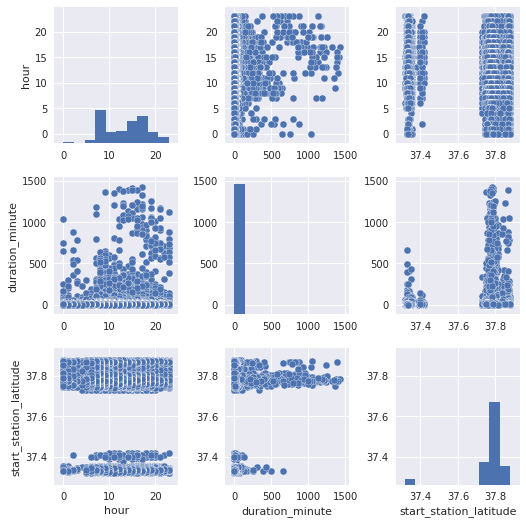

In [61]:
#scatterplot
sns.set()
cols = ['hour', 'duration_minute','start_station_latitude']
sns.pairplot(df[cols])
plt.show();

In [62]:
#histogram and normal probability plot
from scipy import stats

from scipy.stats import norm

sns.distplot(df['hour'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['hour'], plot=plt)

In [63]:
df['start_station_latitude'] = np.log(df['start_station_latitude'])

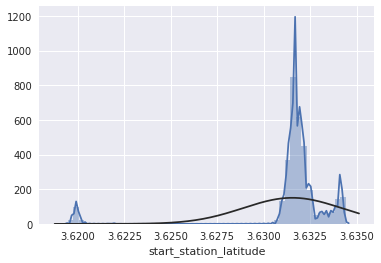

In [64]:
 #transformed histogram and normal probability plot
sns.distplot(df['start_station_latitude'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['start_station_latitude'], plot=plt)

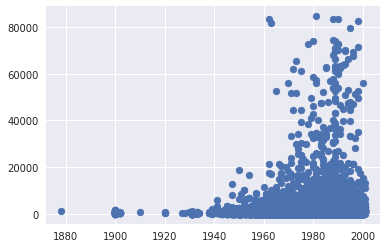

In [65]:
#scatter plot
plt.scatter(df['member_birth_year'], df['duration_sec']);

the 1980 age is the most users and they take long trips 

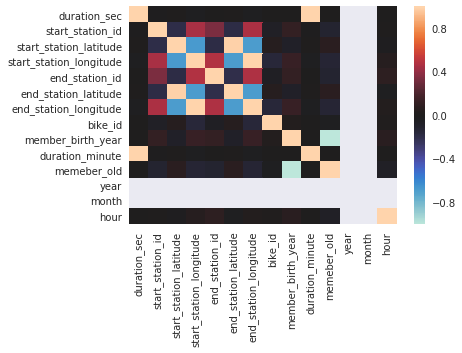

In [66]:
sns.heatmap(df.corr(),fmt = '.2f', center = 0)


####  Duration time, Grouped By gender and Duration day, Grouped By gender

for the last visualization , here, how about we look at the quantity of rides every individual gender bunch took over on the peakest day and hourly . What we see is an intriguing spike for all gender bunches starting in feb 2019. I have no clue about why this might be, yet it would be something worth diving into further!  

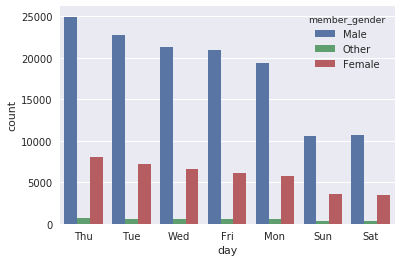

In [67]:
sns.countplot(data = df , x= 'day' , hue = 'member_gender' , order = df.day.value_counts().index)

Thursday is the peak and male are the most uses to the trips 

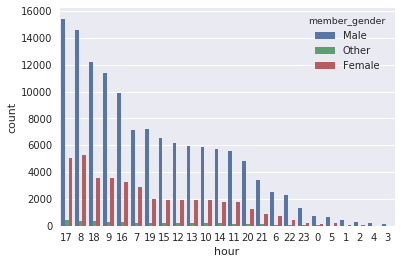

In [74]:
sns.countplot(data = df , x= 'hour' , hue = 'member_gender' , order = df.hour.value_counts().index)